In [1]:
import pandas as pd
reviews = pd.read_csv('review.csv', encoding='latin-1')

In [2]:
reviews = reviews.dropna()

In [3]:
x_d =[]
for i in range(1,reviews['C'].nunique()+1):
    x_d.append(i)

In [3]:
reviews = reviews[["B", "D"]]
reviews = reviews.drop_duplicates(subset='B')

In [4]:
import seaborn as sns 

<AxesSubplot:xlabel='D', ylabel='count'>

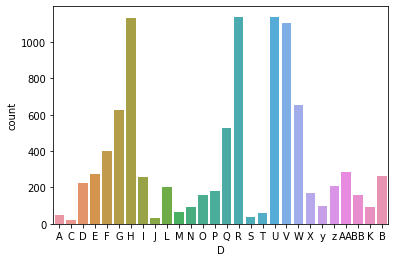

In [5]:
sns.countplot(x="D",data=reviews)

In [6]:
import contractions
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 

In [7]:
import nltk

In [8]:
tk = WordPunctTokenizer()
tk1 = WordNetLemmatizer()

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:


def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
#     text = reviews['Review_Clean_List'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    
    # Expand contractions
    if True:
        text = text.split()
        
        new_text = []
        for word in text:
            if word in contractions.fix(word):
                new_text.append(contractions.fix(word))
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
#     if(len(text)>2):
        
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>4]
    
    
    return text
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text
reviews['Review_Clean_List'] = list(map(text_preprocessing, reviews.B))

# Return to string with to_string function
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [11]:
reviews

,B,D,Review_Clean_List,Review_Clean
0,We couldn't be more thrilled with the work of ...,A,"[couldn, thrill, produce, basketball, help, qu...",couldn thrill produce basketball help quality ...
1,I placed an order online of a design I created...,A,"[place, order, online, design, create, their, ...",place order online design create their website...
2,I've never ordered custom T shirts before and ...,A,"[never, order, custom, shirt, before, decide, ...",never order custom shirt before decide canadia...
3,The folks at CCA have been a joy to work with....,A,"[folks, grateful, find, canadian, custom, appa...",folks grateful find canadian custom apparel ex...
4,Super Impressed! Just received our order! I've...,A,"[super, impress, receive, order, try, online, ...",super impress receive order try online store a...
...,...,...,...,...
9696,Great quality product. 10/10 would recommend,B,"[great, quality, product, would, recommend]",great quality product would recommend
9697,Excellent service and excellent quality. Very ...,B,"[excellent, service, excellent, quality, impress]",excellent service excellent quality impress
9698,I am very happy with the final product of my s...,B,"[happy, final, product, screen, print, impress...",happy final product screen print impress their...
9699,"Fast turnaround, great communication, and exce...",B,"[turnaround, great, communication, excellent, ...",turnaround great communication excellent quali...


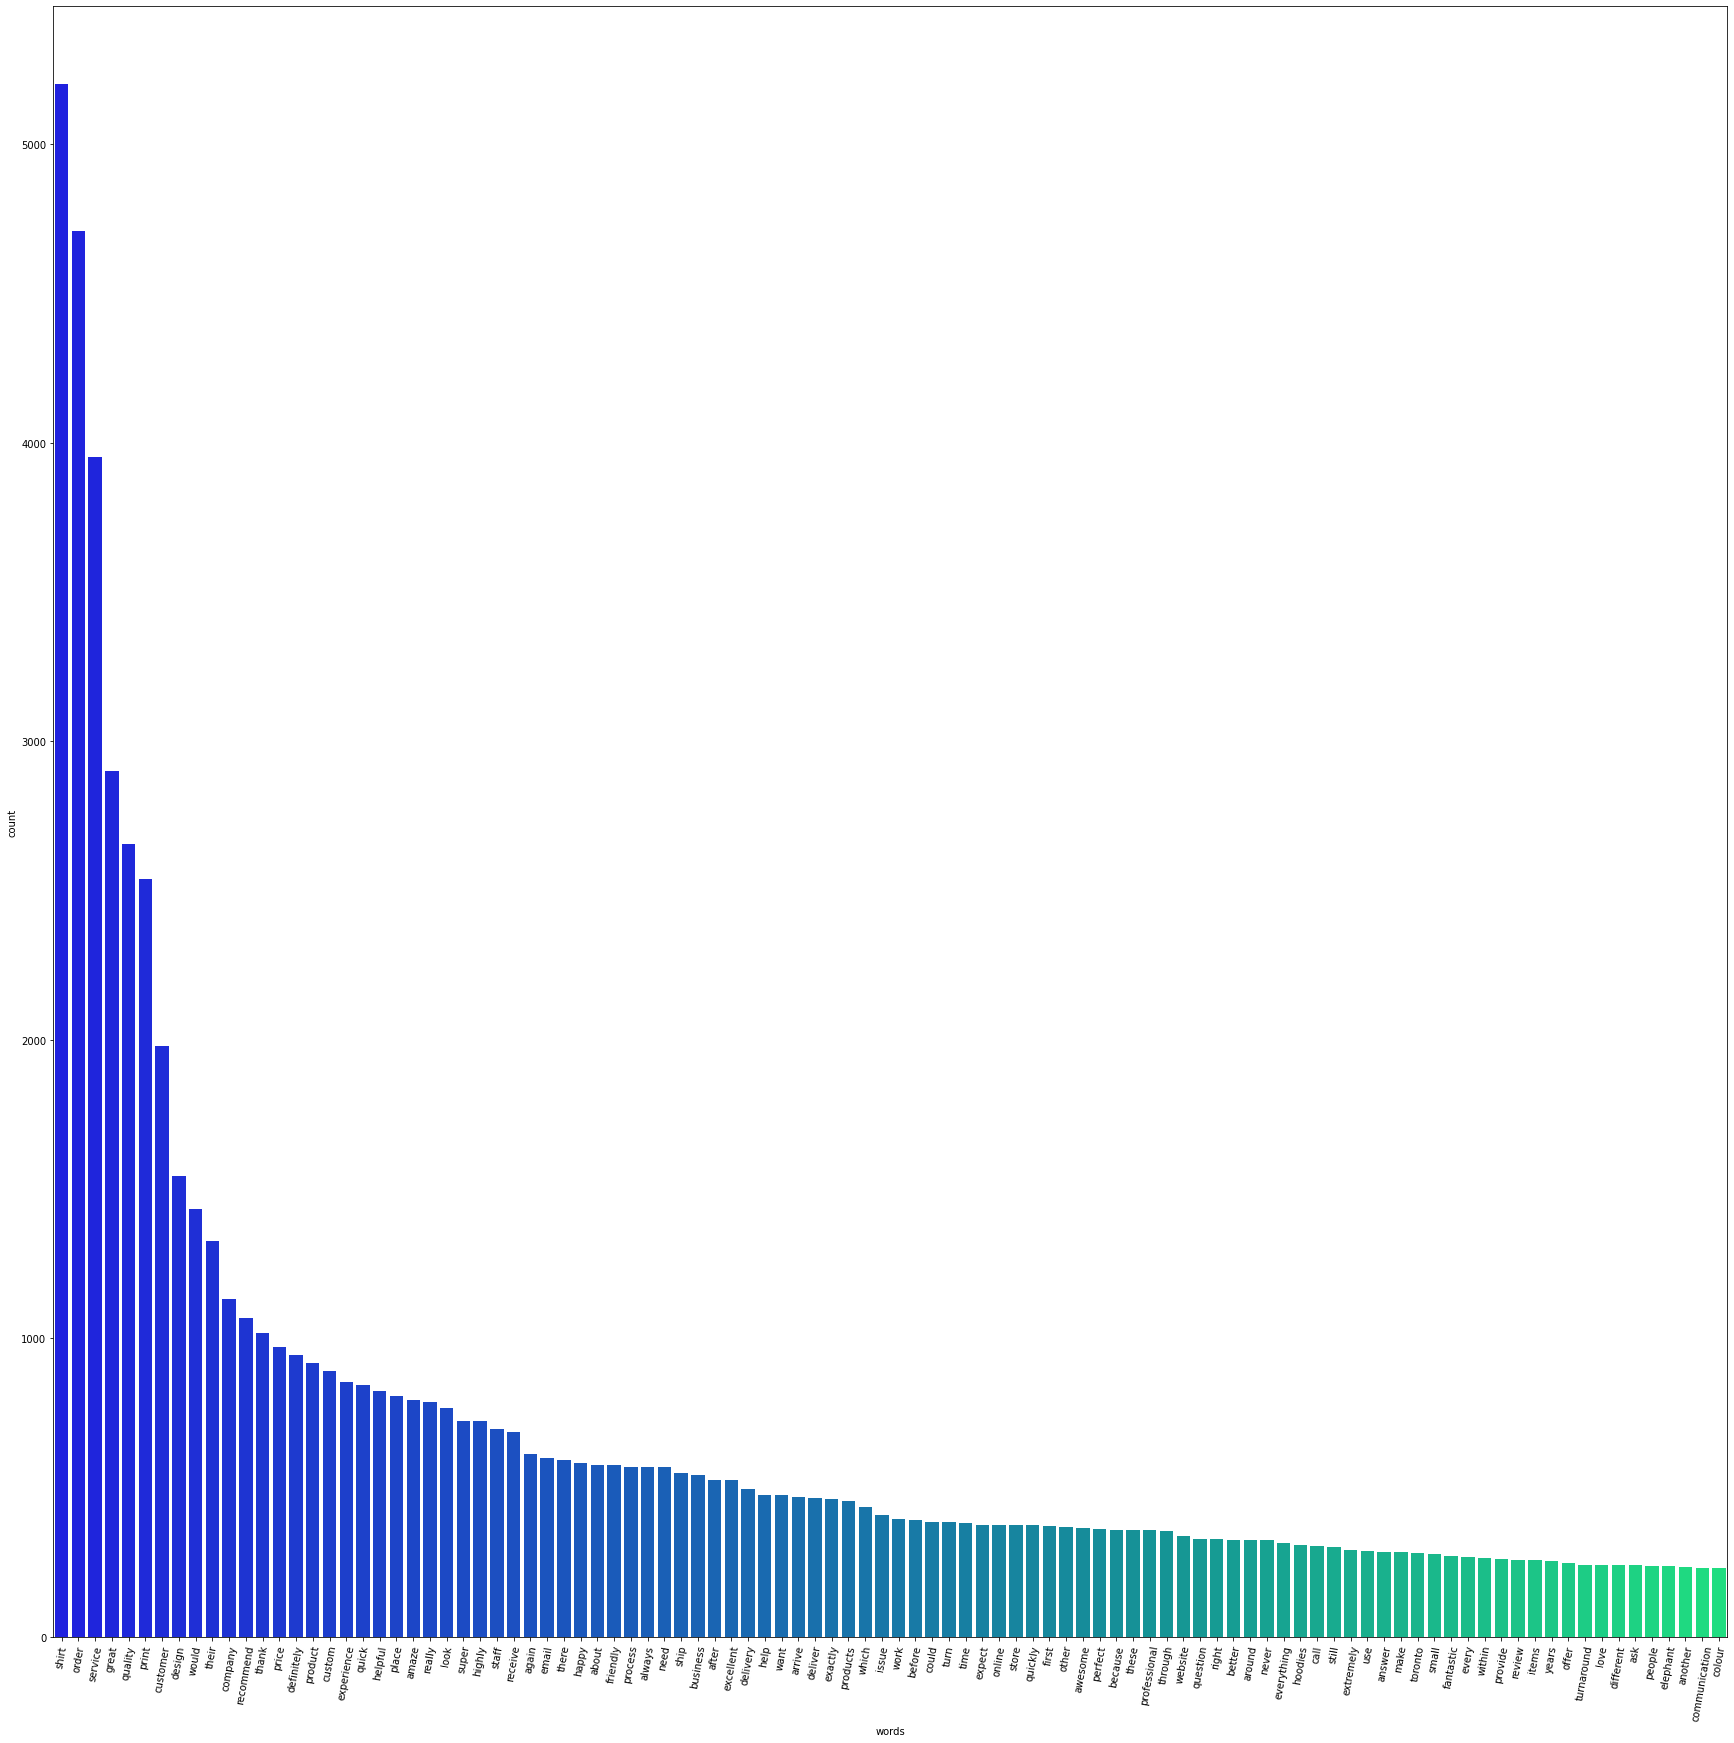

In [12]:
# Import Counter 
import matplotlib.pyplot as plt
from collections import Counter

# Join all word corpus
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count and find the 100 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(100)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (30,30))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=80)
plt.savefig("topic_model.pdf",dpi=300, bbox_inches='tight')
plt.savefig("topic_model.png",dpi=300, bbox_inches='tight')
plt.savefig("topic_model.svg",dpi=300, bbox_inches='tight')
plt.savefig("topic_model.jpg",dpi=300, bbox_inches='tight')

In [130]:
#!git clone https://github.com/amueller/word_cloud.git

Cloning into 'word_cloud'...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


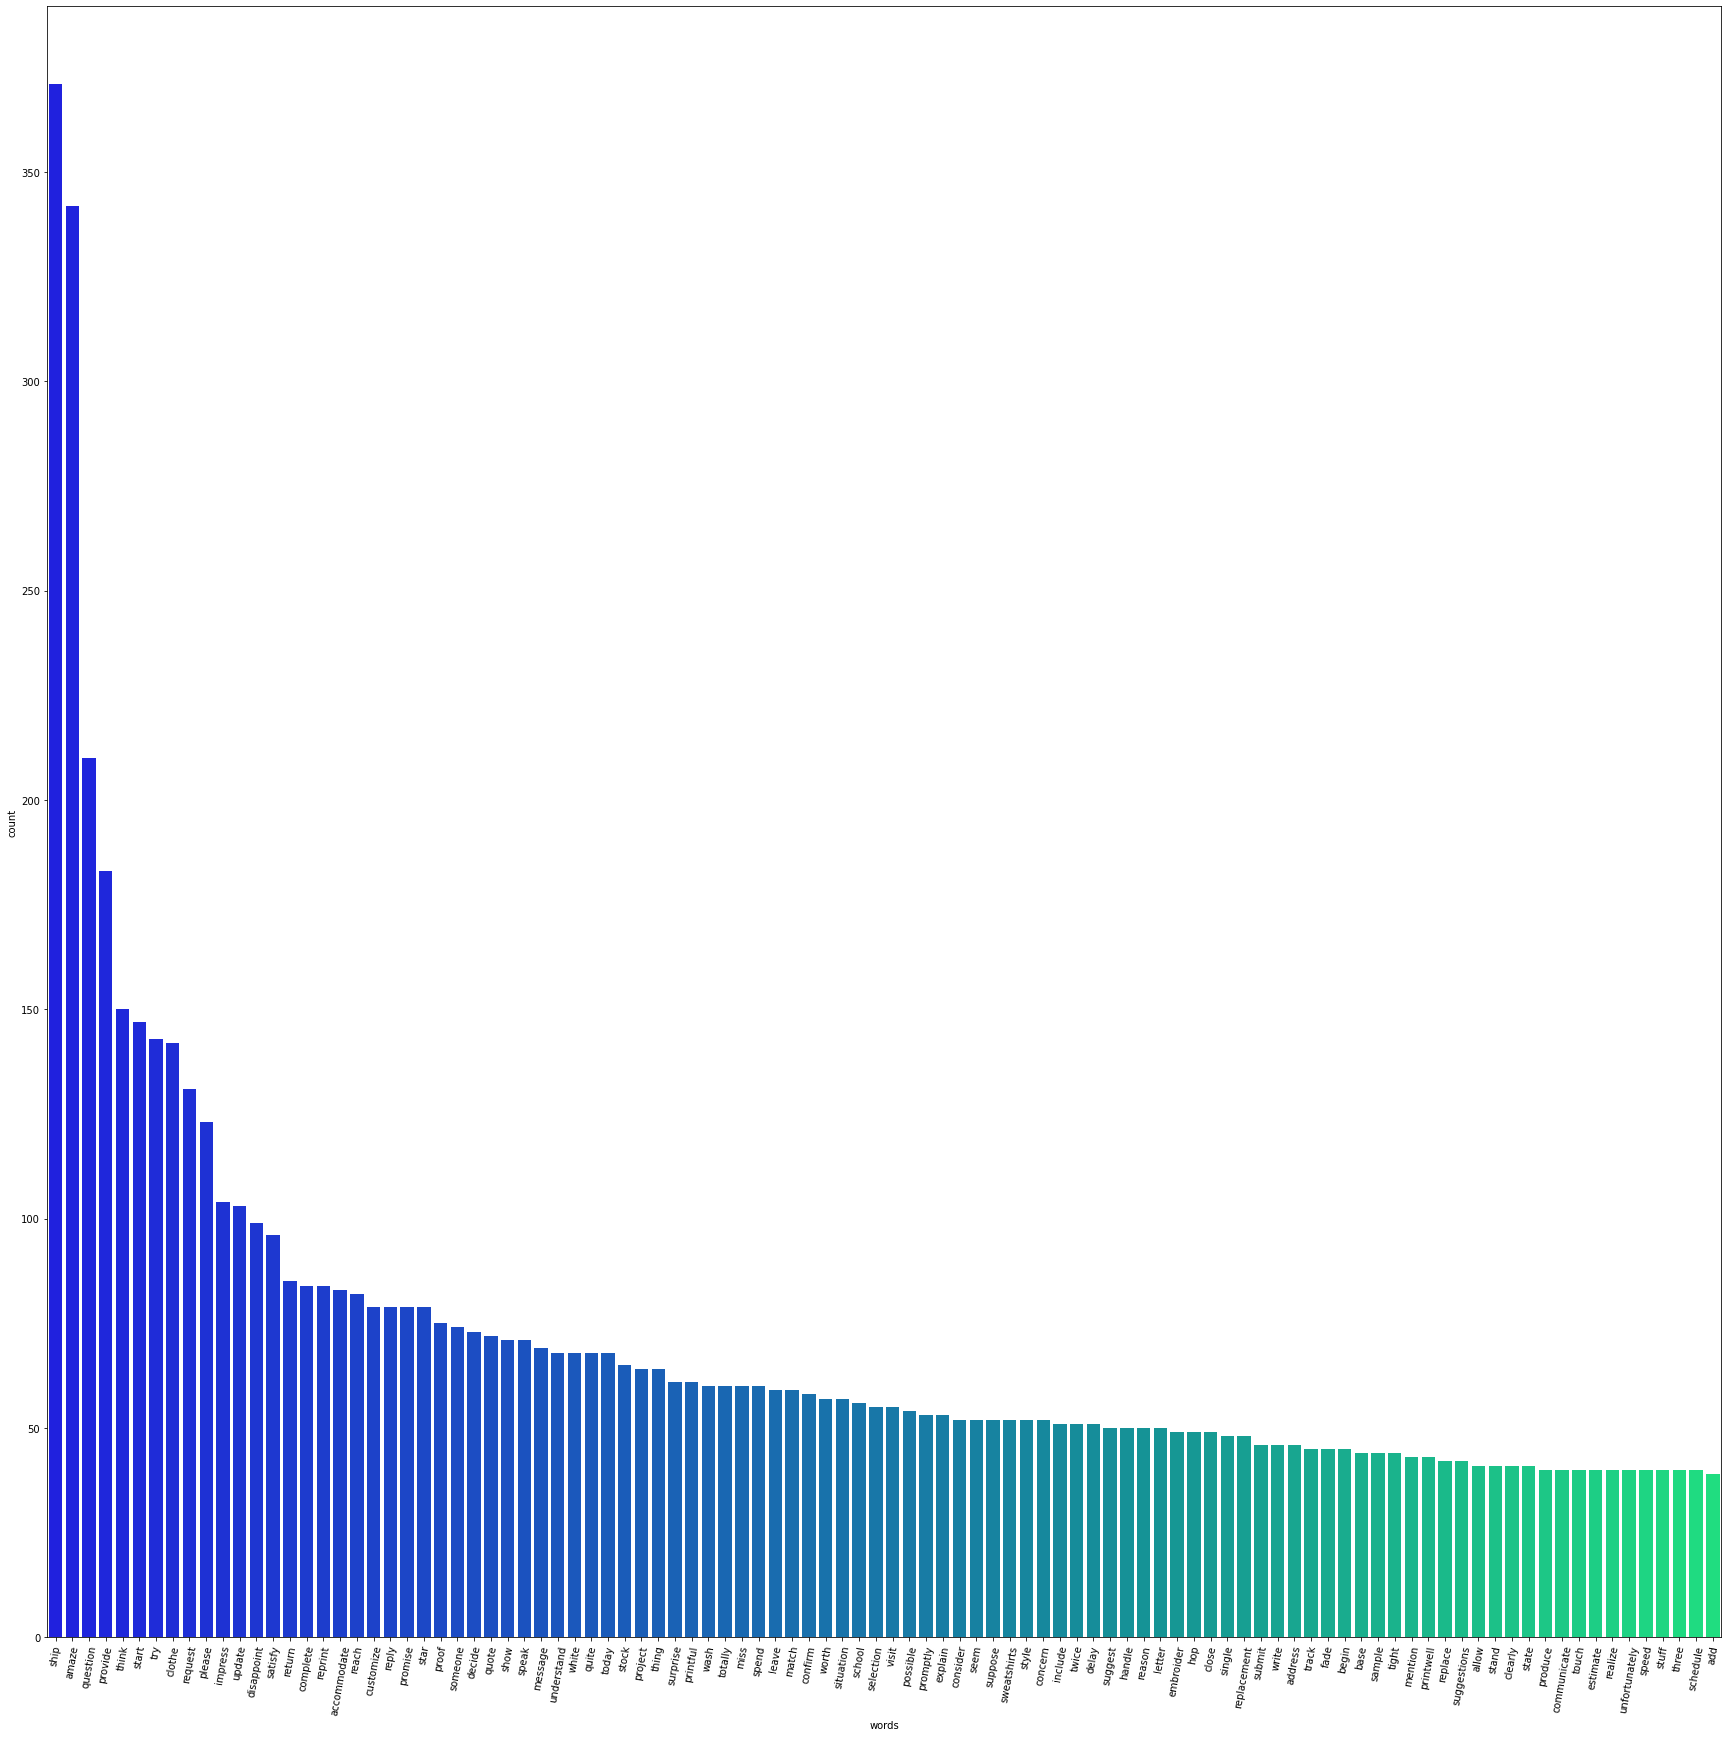

In [13]:
# Load the list of stopwords
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')

stopwords_list = stopwords.words('english')
stopwords_list.extend(['a',	'1',	'2',	'3',	'4',	'5',	'6',	'7',	'10',	'15',	'20',	'24',	'30',	'100',	'able',	'absolutely',	'accommodating',	'actually',	'advice',	'affordable',	'again',	'costal',	'ago',	'ahead',	'all',	'almost',	'already',	'also',	'always',	'amazing',	'amount',	'an',	'and',	'andrew',	'another',	'answer',	'answered',	'anyone',	'anything',	'anywhere',	'apparel',	'appreciate',	'appreciated',	'are',	'armias',	'around',	'arrive',	'arrived',	'art',	'artwork',	'as',	'ask',	'asked',	'at',	'attention',	'attentive',	'available',	'away',	'awesome',	'back',	'bad',	'bags',	'baked',	'based',	'be',	'beautiful',	'been',	'best',	'better',	'beyond',	'big',	'birthday',	'bit',	'black',	'bold',	'bought',	'brand',	'bring',	'business',	'but',	'buy',	'by',	'call',	'called',	'calls',	'came',	'canada',	'canadian',	'cannot',	'care',	'change',	'changes',	'charge',	'chat',	'cheap',	'check',	'choice',	'choices',	'choose',	'chose',	'chris',	'christmas',	'clear',	'client',	'clients',	'clothes',	'clothing',	'coastal',	'color',	'colors',	'colour',	'colours',	'come',	'comfortable',	'coming',	'communication',	'companies',	'company',	'competitive',	'completed',	'completely',	'contact',	'contacted',	'continue',	'cool',	'correct',	'cost',	'cotton',	'could',	'couple',	'courteous',	'covid',	'create',	'custom',	'customer',	'customers',	'customized',	'date',	'day',	'days',	'deadline',	'deal',	'dealing',	'dealt',	'decided',	'definitely',	'deliver',	'delivered',	'delivery',	'design',	'designed',	'designing',	'designs',	'despite',	'detail',	'details',	'different',	'disappointed',	'discount',	'do',	'done',	'door',	'due',	'e',	'earlier',	'early',	'easy',	'efficient',	'elephant',	'else',	'email',	'emailed',	'emails',	'embroidered',	'embroidery',	'employee',	'employees',	'end',	'ended',	'enough',	'ensure',	'entire',	'entripy',	'error',	'especially',	'etc',	'etshirt',	'etshirts',	'even',	'event',	'ever',	'every',	'everyone',	'everything',	'exactly',	'exceeded',	'excellent',	'exceptional',	'excited',	'expect',	'expectations',	'expected',	'expensive',	'experience',	'extra',	'extremely',	'fabric',	'fact',	'fair',	'family',	'fantastic',	'far',	'fast',	'faster',	'feel',	'felt',	'final',	'finally',	'find',	'finish',	'finished',	'first',	'fit',	'fix',	'fixed',	'follow',	'for',	'forward',	'found',	'fred',	'free',	'freshly',	'friday',	'friend',	'friendly',	'friends',	'from',	'front',	'full',	'fun',	'future',	'gave',	'get',	'getbold',	'getting',	'gift',	'gifts',	'give',	'given',	'glad',	'go',	'going',	'good',	'got',	'graphic',	'graphics',	'great',	'group',	'guy',	'guys',	'had',	'happen',	'happier',	'happy',	'hard',	'hats',	'have',	'help',	'helped',	'helpful',	'helping',	'high',	'highly',	'hit',	'hoodie',	'hoodies',	'hope',	'horrible',	'hour',	'hours',	'however',	'huge',	'i',	'idea',	'ideas',	'image',	'immediately',	'impressed',	'in',	'incredible',	'incredibly',	'information',	'ink',	'instacustoms',	'instead',	'is',	'issue',	'issues',	'it',	'item',	'items',	'jacob',	'jerseys',	'job',	'joe',	'joey',	'keep',	'kids',	'kind',	'knew',	'know',	'knowledgeable',	'large',	'last',	'late',	'later',	'least',	'left',	'less',	'let',	'level',	'life',	'like',	'line',	'literally',	'little',	'live',	'local',	'location',	'logo',	'logos',	'long',	'look',	'looked',	'looking',	'looks',	'lot',	'lots',	'love',	'loved',	'low',	'made',	'mail',	'make',	'makes',	'making',	'manager',	'manner',	'many',	'masks',	'material',	'may',	'me',	'merch',	'merchandise',	'met',	'mind',	'ming',	'minute',	'minutes',	'missing',	'mistake',	'mock',	'money',	'month',	'months',	'much',	'mug',	'mugs',	'multiple',	'must',	'my',	'name',	'need',	'needed',	'needs',	'never',	'new',	'next',	'nice',	'no',	'not',	'notch',	'nothing',	'notice',	'number',	'of',	'offer',	'offered',	'on',	'one',	'online',	'option',	'options',	'order',	'ordered',	'ordering',	'orders',	'original',	'others',	'ottawa',	'our',	'out',	'outstanding',	'overall',	'owner',	'package',	'paid',	'part',	'party',	'past',	'patient',	'pay',	'people',	'perfect',	'perfectly',	'person',	'personal',	'personalized',	'phone',	'photo',	'pick',	'picked',	'picture',	'pictures',	'place',	'placed',	'places',	'placing',	'pleasant',	'pleased',	'pleasure',	'plus',	'point',	'polite',	'poor',	'positive',	'pretty',	'price',	'prices',	'pricing',	'print',	'printed',	'printing',	'prints',	'problem',	'process',	'product',	'production',	'products',	'professional',	'promised',	'prompt',	'provided',	'purchase',	'put',	'quality',	'questions',	'quick',	'quickly',	'ready',	'real',	'really',	'reasonable',	'receive',	'received',	'recommend',	'recommended',	'refund',	'reign',	'respond',	'response',	'responsive',	'result',	'results',	'review',	'right',	'rush',	'rushordertees',	's',	'said',	'satisfied',	'say',	'screen',	'second',	'see',	'sent',	'service',	'services',	'several',	'shipped',	'shipping',	'shirt',	'shirts',	'shop',	'short',	'simple',	'since',	'site',	'size',	'sizes',	'small',	'so',	'soft',	'something',	'soon',	'special',	'staff',	'stars',	'still',	'store',	'super',	'support',	'sure',	'sweater',	'sweaters',	't',	'take',	'team',	'tee',	'tees',	'than',	'thank',	'thanks',	'that',	'the',	'their',	'them',	'they',	'things',	'this',	'though',	'thread',	'time',	'timely',	'times',	'to',	'told',	'took',	'top',	'toronto',	'tshirt',	'tshirts',	'turn',	'turnaround',	'turned',	'two',	'up',	'us',	'use',	'used',	'using',	'very',	'wait',	'want',	'wanted',	'was',	'way',	'we',	'wear',	'website',	'week',	'weeks',	'well',	'went',	'were',	'what',	'when',	'whole',	'will',	'with',	'within',	'without',	'wonderful',	'work',	'worked',	'working',	'would',	'wrong',	'year',	'years',	'you',	'your',	'garment',	'ha',	'jeffrey',	'lili',	'a1',	'50',	'8',	'2020',	'17',	'a1',	'll',	'lol',	'xmas',	'17',	'60',	'300',	'pic',	'40',	'le',	'wa',	'pro',	'doesn',	'doe',	'didn',	'girl',	'25',	'don',	'70',	'couldn',	'bachelorette',	'customer_service',	'sweatshirt',	'18',	'wouldn',	'zip',	'vancouver',	'great_service',	'12',	'2021',	'rep',	'11',	'250',	'wasn',	'4th',	'clayton',	'barbara',	'11',	've',	'fab',	'shirt',	'T shirts',	'T-shirts',	'order',	'zip',	'jersey',	'nikki',	'nikkipro',	'le',	'form',	'xfinity',	
                       'husband'])

reviews['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in reviews['Review_Clean_List']]
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

# Join all word corpus
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count and find the 100 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(100)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (30,30))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=80);

In [14]:
import gensim
from gensim import corpora


In [15]:
id2word = gensim.corpora.Dictionary(reviews['Review_Clean_List'])

In [16]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in reviews['Review_Clean_List']]

<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

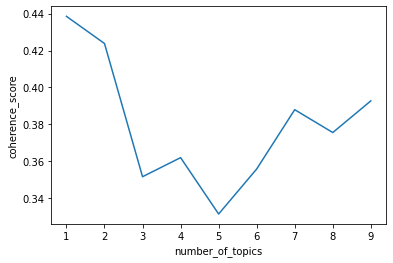

In [17]:
from gensim.models import CoherenceModel

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                       texts=reviews['Review_Clean_List'], 
                                       dictionary=id2word, 
                                       coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [18]:
# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.085*"provide" + 0.046*"request" + 0.044*"satisfy" + 0.040*"think" + 0.037*"embroider" + 0.034*"quote" + 0.023*"selection" + 0.021*"jacket" + 0.018*"totally" + 0.017*"regard"
Topic: 1 Word: 0.095*"accommodate" + 0.071*"impress" + 0.041*"disappoint" + 0.040*"throughout" + 0.028*"possible" + 0.022*"hop" + 0.019*"produce" + 0.016*"try" + 0.015*"listen" + 0.014*"single"
Topic: 2 Word: 0.041*"eddison" + 0.036*"project" + 0.032*"reprint" + 0.025*"exact" + 0.025*"lower" + 0.024*"responses" + 0.022*"realize" + 0.022*"tight" + 0.019*"timeline" + 0.019*"thorough"
Topic: 3 Word: 0.093*"question" + 0.053*"start" + 0.040*"star" + 0.029*"decide" + 0.024*"tyler" + 0.020*"worth" + 0.019*"students" + 0.017*"reason" + 0.016*"maybe" + 0.016*"present"
Topic: 4 Word: 0.057*"please" + 0.051*"recently" + 0.035*"media" + 0.032*"school" + 0.032*"complete" + 0.028*"mask" + 0.025*"return" + 0.024*"promptly" + 0.022*"terrible" + 0.020*"gurnoor"
Topic: 5 Word: 0.284*"amaze" + 0.087*"ship" + 0.019*"

In [20]:
import pyLDAvis.gensim_models

In [21]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, 
                                     corpus, 
                                     dictionary=lda_model.id2word)


C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [22]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.358591  0.079419       1        1  14.457163
0     -0.101085  0.223551       2        1  13.386724
7     -0.044506  0.011553       3        1  13.162739
3     -0.034284 -0.067209       4        1  12.697899
1     -0.095484 -0.086438       5        1  12.543054
5      0.031678 -0.276830       6        1  12.173691
2     -0.062964  0.102717       7        1  11.540374
6     -0.051947  0.013237       8        1  10.038356, topic_info=             Term         Freq        Total Category  logprob  loglift
30          amaze  1417.000000  1417.000000  Default  30.0000  30.0000
42         clothe   585.000000   585.000000  Default  29.0000  29.0000
547   accommodate   491.000000   491.000000  Default  28.0000  28.0000
14       question   486.000000   486.000000  Default  27.0000  27.0000
100       provide   467.000000   467.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
5     anniversary    33.817289    35.308433   Topic8  -4.8008   2.2556
576       usually    40.554620    42.975131   Topic8  -4.6192   2.2408
796        centre    43.626853    49.509066   Topic8  -4.5461   2.1723
2239     increase    48.765149    60.406046   Topic8  -4.4348   2.0847
1077       mostly    33.062661    36.695172   Topic8  -4.8234   2.1945

[297 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
547       5  0.997820  accommodate
589       6  0.983116      account
135       3  0.970300       across
69        6  0.983459   additional
417       8  0.966072      address
...     ...       ...          ...
312       3  0.976342      weekend
1952      5  0.983326      welcome
1105      7  0.983919     whatever
106       2  0.969630        white
158       4  0.989456        worth

[313 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 8, 4, 2, 6, 3, 7])

In [23]:
pyLDAvis.save_html(vis, 'lda.html')